# CS 178 HW3

#### Malav Pandya
Student ID: 91044866

## Problem 1: Perceptrons and Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import logisticClassify2 as lo

iris = np.genfromtxt("data/iris.txt",delimiter=None);
X, Y = iris[:,0:2], iris[:,-1];
X,Y = ml.shuffleData(X,Y);
X,_ = ml.transforms.rescale(X);


XA, YA = X[Y<2,:], Y[Y<2]; #get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]; #get class 1 vs 2

### (a)

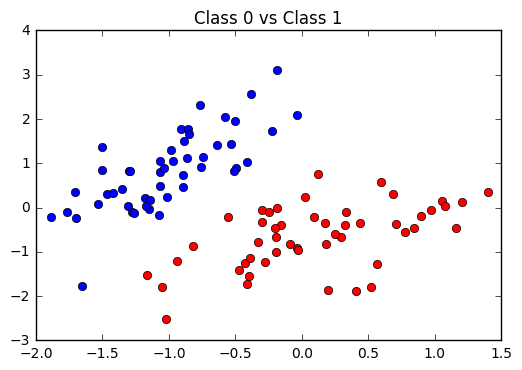

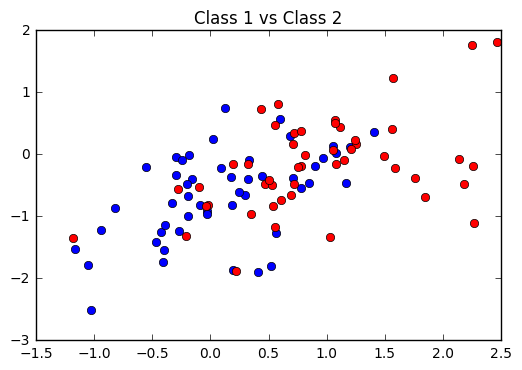

In [2]:
plt.plot(X[Y==0,0], X[Y==0,1], 'bo');
plt.plot(X[Y==1,0], X[Y==1,1], 'ro');
plt.title("Class 0 vs Class 1")
plt.show();

plt.figure();

plt.plot(X[Y==1,0], X[Y==1,1], 'bo');
plt.plot(X[Y==2,0], X[Y==2,1], 'ro');
plt.title("Class 1 vs Class 2")
plt.show();

As seen above, Class 0 vs Class 1 dataset is linearly separable because the points can be distinctively separated by a line while it is not possible with the Class 1 vs Class 2 dataset.

### (b)

def plotBoundary(self,X,Y):
        
        if len(self.theta)!=3: raise ValueError('Data & model must be 2D')
        ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
        
        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b #2x1
        
        x1b = x1b[:,np.newaxis];
        th = self.theta;
        x2b = - (th[0] + x1b.dot(th[1]))/th[2];     
         
        A = Y==1;                                              # and plot it:
        plt.plot(X[A,0],X[A,1],'ro',X[-A,0],X[-A,1],'bo',x1b,x2b,'k-'); plt.axis(ax); plt.draw();

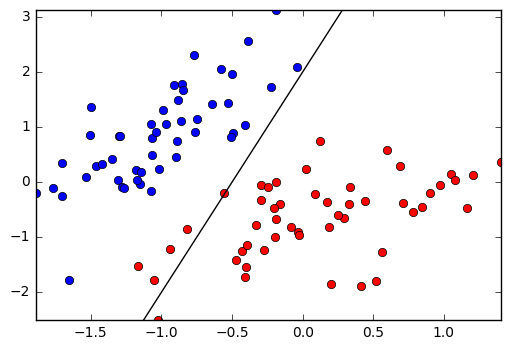

In [3]:
learner = lo.logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB


wts = np.array([0.5,1,-0.25]); # TODO: fill in values
wts = wts[:,np.newaxis];
learner.theta = wts; # set the learner's parameters

learner.plotBoundary(XA,YA);
plt.show();

### (c)

def predict(self, X):
        """ Return the predictied class of each data point in X"""
       
        arrlen = len(X);
        r = [None] * arrlen;
        z = [None] * arrlen;
        Yhat = [None] * arrlen;

        th = self.theta;
        i = 0;
        for i in range(len(X)):
            r[i] = th[0] + X[i,0]*th[1] + X[i,1]*th[2];
            z[i] = 1 if(r[i]>0) else 0;
            Yhat[i] = self.classes[1] if(z[i]>0) else self.classes[0];
        
        Yhat = np.asarray(Yhat);
        return Yhat

#### Error on dataset XA,YA

In [4]:
learner.classes = np.unique(YA) # define class labels using YA or YB

In [5]:
YAhat = [None] * len(XA);
YAhat = learner.predict(XA);


i = 0; err = 0;
for i in range(len(YAhat)):
    err += 1 if (YAhat[i] != YA[i]) else 0 ;

fracterr = err/(len(YAhat));     
print(fracterr);

0.050505050505050504


#### Error on dataset XB,YB

In [6]:
learner.classes = np.unique(YB) # define class labels using YA or YB

In [7]:
YBhat = [None] * len(XB);
YBhat = learner.predict(XB);


i = 0; err = 0;
for i in range(len(YBhat)):
    err += 1 if (YBhat[i] != YB[i]) else 0 ;

fracterr = err/(len(YBhat));     
print(fracterr);

0.46464646464646464


### (d)

#### Dataset A:

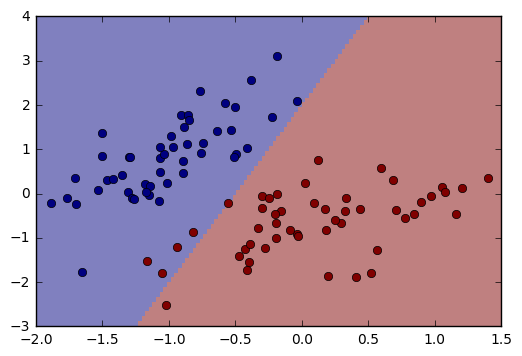

In [8]:
learner.classes = np.unique(YA) # define class labels using YA or YB
plt.figure();
ml.plotClassify2D(learner,XA,YA);
plt.show();

Figure computed analytically (from before):

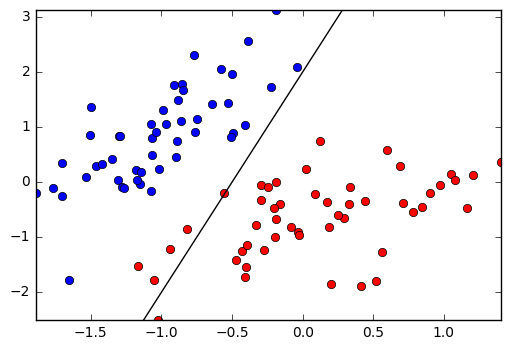

In [9]:
learner.plotBoundary(XA,YA);
plt.show();

The figures match.

#### Dataset B:

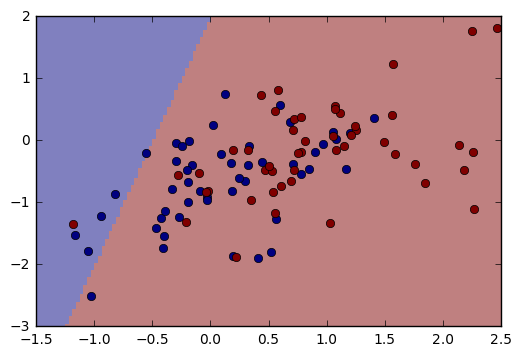

In [10]:
learner.classes = np.unique(YB) # define class labels using YA or YB
plt.figure();
ml.plotClassify2D(learner,XB,YB);
plt.show();

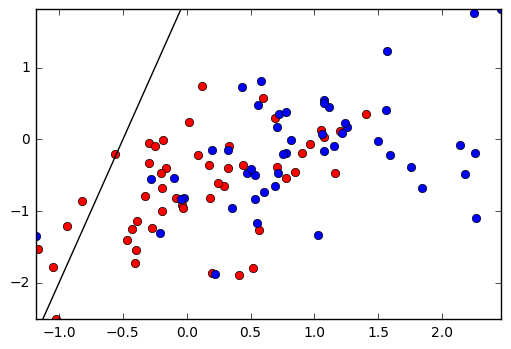

In [11]:
learner.plotBoundary(XB,YB);
plt.show();

The figures match

### (e)

![alt text]( pic.png)

$ \sigma (z) = \frac{1}{1 + exp^-z} $

$ z = \theta^T x $

### (f)(g)

    def sig(self, z):
        return (1.0 / (1.0 + np.exp(-z) ));
        
    def compGrad(self,x,y,r):
        x = x[:,np.newaxis];
        h = self.sig(r);
        return x.dot(h-y);
    
    def act(self,x):
        x = x[:,np.newaxis];
        p = x.T.dot(self.theta);
        return self.sig(p);

def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):

        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X))   # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[]; 
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = XX[i,:].dot(self.theta);     # TODO: compute linear response r(x)
                
                gradi = self.compGrad(XX[i,:],YY[i],ri);     # TODO: compute gradient of NLL loss
                gradi = gradi.reshape(3,1);
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) );  # evaluate the current error rate 
            i=0;sum=0;
            for i in range(len(YY)):
                    sum += YY[i] * np.log(self.act(XX[i,:])) + (1-YY[i]) * np.log(1-self.act(XX[i,:]));
            Jsur = sum[0]/len(YY);
            Jnll.append( -Jsur ); # TODO evaluate the current NLL loss
            plt.pause(.01);                    # let OS draw the plot
            done = (epoch > stopEpochs) or (Jsur < stopTol);
        plt.figure(); plt.plot(Jnll,'b-', J01,  'r-');
        plt.figure();self.plotBoundary(X,Y);

#### For dataset A:

Initial Step = 1.0

stopTol=1e-4

stopEpochs=5000

theta = random

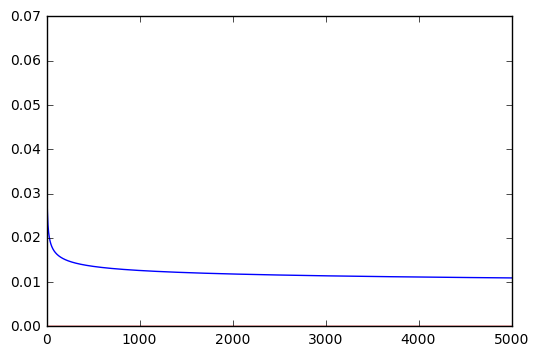

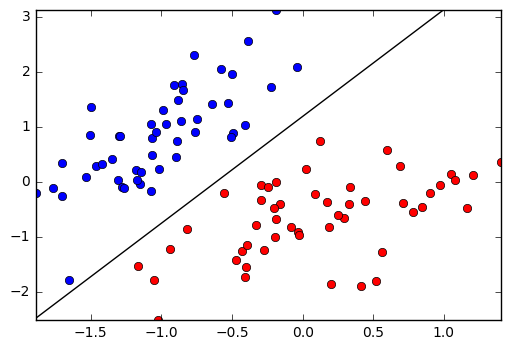

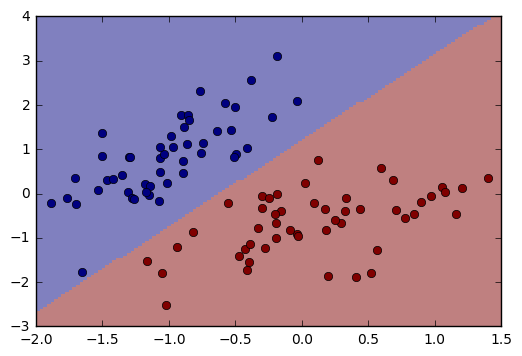

In [12]:
learner.classes = np.unique(YA) 
wts = np.random.rand(3);
wts = wts[:,np.newaxis];
learner.theta = wts; # set the learner's parameters
learner.train(XA,YA);
plt.figure();
ml.plotClassify2D(learner,XA,YA);
plt.show();

#### For dataset B:

Initial Step = 1.0

stopTol=1e-4

stopEpochs=5000

theta = random

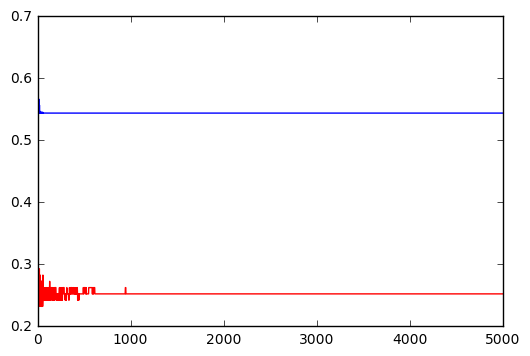

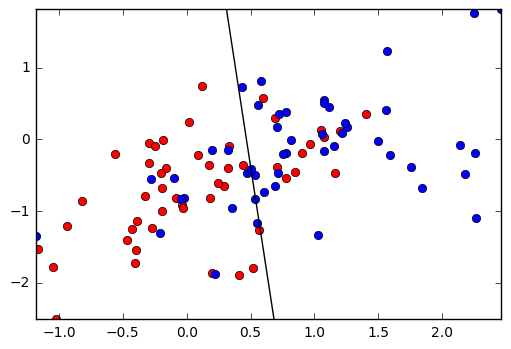

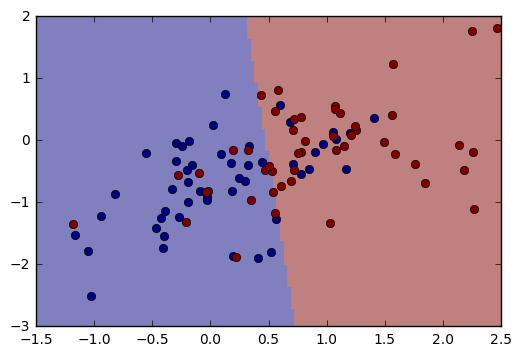

In [13]:
learner.classes = np.unique(YB) 
wts = np.random.rand(3);
wts = wts[:,np.newaxis];
learner.theta = wts; # set the learner's parameters
learner.train(XB,YB);
plt.figure();
ml.plotClassify2D(learner,XB,YB);
plt.show();

## Problem 2: Shattering and VC Dimension

### (a)

This learner can shatter (a) and (b) but not (c) or (d). It line with slope of b and y intercept of a (it has only two parameters). Since it is a line, it can shatter points in (a), (b) since both have less than 3 points. The learner is unable to shatter the other examples because they have more than 2 points. 

### (b)

The learner can shatter (a), (b), (c). Since it has three parameters, it can shatter up to three points. The function is of a circle with center at parameters (a,b) with radius c. With the decision boundary of a circle, it can classify points based on whether they are inside the circle or outside. This enables the classifier to shatter points in (a),(b),(c) but not (d). If two exterior points are of the same class, the learner circle will contain all the interior points as well. 

### (c)

The learner can shatter (a) and (b) only. Although there are 3 parameters, they are not independent. Additionally, this is a linear classifier but without a y-intercept. So the learner is only a line through the origin, thus it can easily shatter the points in (a) and (b). On (c), if (6,4) and (4,8) are of the same class and (2,2) a different class, then the learner will not be able to shatter it. Similar reasoning for (d). 